# Notebook to analyzize data for ML characterization paper 

In [215]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd 
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, interact_manual
import os
sns.set_context("paper")
sns.set(font_scale = 1.4)
sns.set_style("ticks")
# sns.set_palette("deep")
sns.set_palette("twilight_shifted")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Typewriter"
})

## SUMMARY

In [216]:
data_csv = "./summary.csv"
data_df = pd.read_csv(data_csv, comment='#')
data_df['Average'] = data_df.groupby(['Scenario','Number of individuals'])['Makespan'].transform('mean')
temp_df = data_df[['Scenario','Number of individuals','Average']].drop_duplicates() 
t_df = temp_df.loc[temp_df['Scenario'] == '\\textsc{Vanilla}']
s = t_df.set_index('Number of individuals')['Average']
temp_df['Percentage of Pegasus only (\%)'] = temp_df['Average']*100 / temp_df['Number of individuals'].map(s)
temp_df

,Scenario,Number of individuals,Average,Percentage of Pegasus only (\%)
0,\textsc{PegDecaf},10,8567.522887,65.301192
5,\textsc{PegDecaf},16,5512.027179,55.375008
10,\textsc{PegDecaf},2,46296.647212,73.267839
15,\textsc{PegDecaf},5,17688.654504,74.068524
20,\textsc{Vanilla},10,13120.010000,100.000000
25,\textsc{Vanilla},16,9953.998000,100.000000
30,\textsc{Vanilla},2,63188.225000,100.000000
35,\textsc{Vanilla},5,23881.472800,100.000000
40,\textsc{PMC},10,12090.942756,92.156506
45,\textsc{PMC},16,8012.123689,80.491514


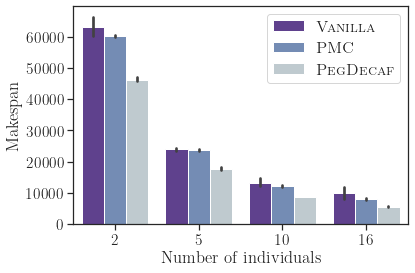

In [217]:
hue_order = ['\\textsc{Vanilla}', '\\textsc{PMC}', '\\textsc{PegDecaf}']
ax = sns.barplot(x='Number of individuals', y='Makespan', hue='Scenario', data=data_df, hue_order=hue_order)
ax.legend_.set_title("")
plt.savefig('1000genome_result_makespan.pdf', bbox_inches='tight', dpi=12000)
# plt.savefig('walltime.png', bbox_inches='tight')

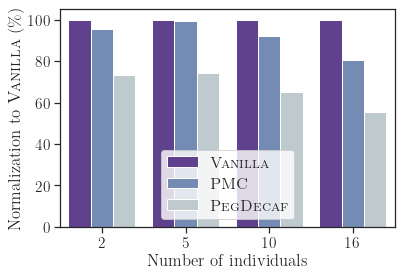

In [218]:
hue_order = ['\\textsc{Vanilla}', '\\textsc{PMC}', '\\textsc{PegDecaf}']
ax = sns.barplot(x='Number of individuals', y='Percentage of Pegasus only (\%)', hue='Scenario', data=temp_df, hue_order=hue_order)
ax.legend_.set_title("")
ax.set_ylabel('Normalization to \\textsc{Vanilla} (\%)')
plt.legend(loc=8)
plt.savefig('1000genome_result_normalization.pdf', bbox_inches='tight', dpi=12000)
# plt.savefig('percentage.png', bbox_inches='tight')

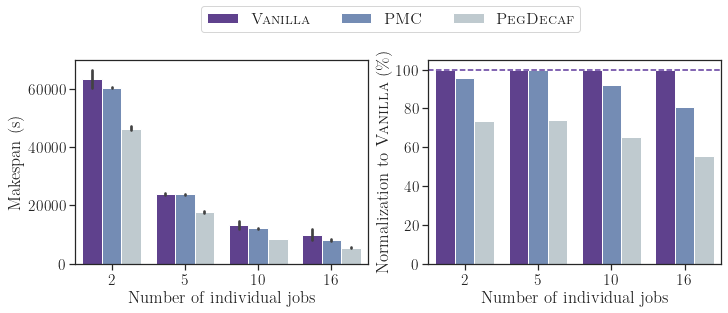

In [219]:
sns.set_palette("twilight_shifted")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3.5), constrained_layout=True)
ax0 = sns.barplot(x='Number of individuals', y='Makespan', hue='Scenario', data=data_df, hue_order=hue_order, ax=axes[0])
ax0.legend().set_visible(False)
ax0.set_ylabel('Makespan (s)')
ax0.set_xlabel("Number of individual jobs")
ax1 = sns.barplot(x='Number of individuals', y='Percentage of Pegasus only (\%)', hue='Scenario', data=temp_df, hue_order=hue_order, ax=axes[1])
ax1.axhline(100, linestyle='--', linewidth=1.5)
ax1.legend().set_visible(False)
ax1.set_xlabel("Number of individual jobs")
ax1.set_ylabel("Normalization to \\textsc{Vanilla} (\%)")
# plt.legend(loc=8)
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.8, 1.2), borderaxespad=0, ncol=3)
plt.savefig('1000genome_result.pdf', bbox_inches='tight', dpi=12000)
# plt.savefig('walltime.png', bbox_inches='tight')

In [220]:
debug_df = pd.read_csv("./debug.csv", comment='#')
debug_df

,Scenario,Start,Duration
0,PMC,2021-10-13T12:48:58,7196.181
1,PMC,2021-10-13T12:48:58,7298.147
2,PMC,2021-10-13T12:48:58,7284.725
3,PMC,2021-10-13T12:48:58,7321.033
4,PMC,2021-10-13T12:48:58,7266.703
5,PMC,2021-10-13T12:48:58,7303.926
6,PMC,2021-10-13T12:48:58,7335.711
7,PMC,2021-10-13T12:48:58,7361.326
8,PMC,2021-10-13T12:48:58,7370.093
9,PMC,2021-10-13T12:48:58,7304.217


<AxesSubplot:xlabel='Scenario', ylabel='Duration'>

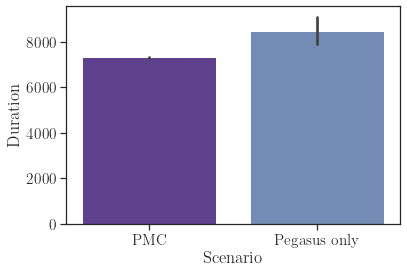

In [221]:
sns.barplot(x='Scenario', y='Duration', data=debug_df)

In [222]:
from datetime import datetime
datetime.strptime('2021-10-02T17:54:33','%Y-%m-%dT%H:%M:%S')
# date_time_obj = datetime.strptime(date_time_str, '%y-%m-%yT%H:%M:%S-07:00')
# data_time_obj
debug_df['Start Time'] = pd.to_datetime(debug_df['Start'], format='%Y-%m-%dT%H:%M:%S')
debug_df

,Scenario,Start,Duration,Start Time
0,PMC,2021-10-13T12:48:58,7196.181,2021-10-13 12:48:58
1,PMC,2021-10-13T12:48:58,7298.147,2021-10-13 12:48:58
2,PMC,2021-10-13T12:48:58,7284.725,2021-10-13 12:48:58
3,PMC,2021-10-13T12:48:58,7321.033,2021-10-13 12:48:58
4,PMC,2021-10-13T12:48:58,7266.703,2021-10-13 12:48:58
5,PMC,2021-10-13T12:48:58,7303.926,2021-10-13 12:48:58
6,PMC,2021-10-13T12:48:58,7335.711,2021-10-13 12:48:58
7,PMC,2021-10-13T12:48:58,7361.326,2021-10-13 12:48:58
8,PMC,2021-10-13T12:48:58,7370.093,2021-10-13 12:48:58
9,PMC,2021-10-13T12:48:58,7304.217,2021-10-13 12:48:58


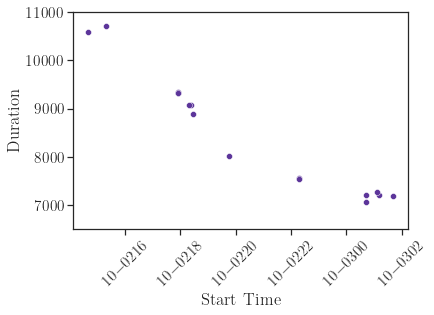

In [223]:
sub_df = debug_df[debug_df['Scenario'] == "Pegasus only"]
ax = sns.scatterplot(x='Start Time',y='Duration',data=sub_df)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylim([6500, 11000])
plt.savefig('pmc_individuals.png', bbox_inches='tight')

(6500.0, 11000.0)

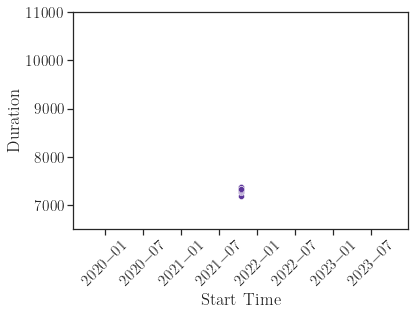

In [224]:
sub_df = debug_df[debug_df['Scenario'] == "PMC"]
ax = sns.scatterplot(x='Start Time',y='Duration',data=sub_df)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylim([6500, 11000])

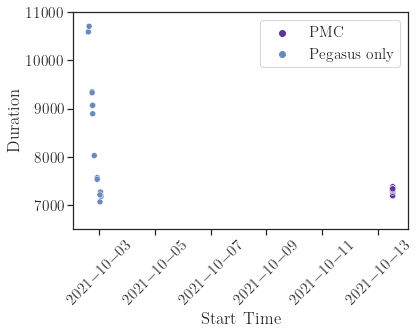

In [225]:
ax = sns.scatterplot(x='Start Time',y='Duration',data=debug_df, hue='Scenario')
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylim([6500, 11000])
ax.legend_.set_title("")
plt.savefig('details.png', bbox_inches='tight')

Todo: Normalize to pegasus